# CS530 Homework 7 Part 2

Queston 1 (1 points) 

a. Fit a KNN classifier on the Heart Disease dataset from Homework 6 (data is also included in the folder here) using the Scikit-learn package, plot your ROC curve on the testing set and compute the AUC. 


In [8]:
# Your code goes here
import pandas as pd
train = pd.read_csv("../hw7part2/train.csv")
train.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
1,1,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
2,2,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
3,3,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
4,4,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) #K=3
features = train.loc[:,'age':'thal']
label = train['target']
model.fit(features, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
predicted = model.predict(features)
print(predicted)

[0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 0]


b. Compare your result with HW6. Does KNN do better on the classification? Explain


In [11]:
test = pd.read_csv("../hw7part2/test.csv")

In [12]:
# your code goes here
test_features = test.loc[:,'age':'thal']
test_label = test['target']
model.score(test_features, test_label)

0.6842105263157895

No, KNN does not do better than LDA or Logistic Regression.

Question 2 (2 points) Implement from scratch the function MyKNN() that classifies the matrix X_test (samples × features) using the KNN algorithm we learned in class. The inputs for the function should be the training set X_train, the labels y_train, the parameter k, and the matrix X_test. The output for the function should be y_test, your prediction for the label of X_test. Test your function on the Iris dataset and compare it to the KNN classifier (use the default parameters other than n_neighbors) of scikit-learn for that dataset (as in Question 1).


In [14]:
import numpy as np
def distance(p1, p2):
    point1 = np.array(p1) 
    point2 = np.array(p2)
    
    return np.linalg.norm(point1 - point2)

In [15]:
def MyKNN(X_train, y_train, k, X_test):
    y_test = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            sample_x_test = X_test.iloc[i,:]
            neighbor = X_train.iloc[j,:]
            dist = distance(sample_x_test, neighbor)
            distances.append(dist)
        distances = np.array(distances)
        sorted_dist = np.argsort(distances)
        top_k_neighbors_indices = sorted_dist[:k] #get the indices not distances
        y_test.append(np.round(np.mean(y_train.iloc[top_k_neighbors_indices]))) #access y_train
    return y_test

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [17]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
X_iris = iris_data.loc[:,'sepal length (cm)':'petal width (cm)']
y_iris = iris_data['target']

In [19]:
from sklearn.cross_validation import train_test_split
X_train_iris,X_test_iris,y_train_iris,y_test_iris=train_test_split(X_iris,y_iris,test_size=0.5)

/Users/gracegupta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
print(np.array(y_test_iris))

[2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 2. 0. 2. 1. 2. 2. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 2. 2. 1. 1. 2. 0. 1. 1. 2. 1. 1. 0. 0. 2. 2. 2. 2. 1. 2. 0. 1. 0.
 1. 0. 2. 2. 0. 1. 0. 1. 1. 1. 2. 0. 0. 2. 1. 2. 2. 0. 2. 1. 1. 0. 2. 1.
 1. 1. 2.]


In [22]:
predicted_iris_myKNN = MyKNN(X_train_iris, y_train_iris, 4, X_test_iris)
predicted_iris_myKNN = np.array(predicted_iris_myKNN)
print(predicted_iris_myKNN)

[2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 1. 0. 0. 2. 0. 1.
 1. 0. 2. 2. 1. 2. 2. 0. 1. 1. 2. 1. 1. 0. 0. 2. 2. 2. 2. 1. 2. 0. 1. 0.
 1. 0. 2. 2. 0. 1. 0. 1. 1. 2. 2. 0. 0. 2. 1. 2. 2. 0. 2. 1. 1. 0. 2. 2.
 1. 2. 2.]


In [24]:
model_iris = KNeighborsClassifier(n_neighbors=4) 
model_iris.fit(X_train_iris, y_train_iris)
predicted_iris = model_iris.predict(X_test_iris)
print(predicted_iris)

[2. 0. 2. 2. 0. 0. 2. 2. 0. 2. 2. 0. 2. 1. 2. 2. 0. 0. 1. 0. 0. 2. 0. 1.
 1. 0. 2. 2. 1. 2. 2. 0. 1. 1. 2. 1. 1. 0. 0. 2. 2. 2. 2. 1. 2. 0. 1. 0.
 1. 0. 2. 2. 0. 1. 0. 1. 1. 2. 2. 0. 0. 2. 1. 2. 2. 0. 2. 1. 1. 0. 2. 2.
 1. 1. 2.]


In [25]:
model_iris.score(X_test_iris, y_test_iris) #KNN score from scikit learn

0.9466666666666667

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test_iris, predicted_iris_myKNN)

0.92

The sklearn model performs slightly better (0.946 compared to 0.92) for k=4.

Question 3 (3 points) 

a. Create two 2-dimensional Gaussian (normal) distribution with mean (1,0) and (-1,0), and the identity matric as their covariance matrices. Create labels for the data of the two distribution, apply train-test-split, and use KNN to make a prediction on the test set. (Hint: Use the [numpy.random.multivariate_normal](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html) to create normal distribution dataset) 

In [34]:
# Your code goes here
mean_a = [1, 0]
mean_b = [-1, 0]
cov =  [[1, 0], [0, 1]] 
x_a, y_a = np.random.multivariate_normal(mean_a, cov, 5000).T
x_b, y_b = np.random.multivariate_normal(mean_b, cov, 5000).T

In [35]:
X_a = np.concatenate((x_a, y_a), axis=0)

In [36]:
Y_a = np.full((10000,), 0)

In [37]:
X_b = np.concatenate((x_b, y_b), axis=0)

In [38]:
Y_b = np.full((10000,), 1)

In [39]:
X_gauss = np.concatenate((X_a, X_b), axis=0)
y_gauss = np.concatenate((Y_a, Y_b), axis=0)

In [40]:
#Create labels for the data of the two distribution, apply train-test-split
X_train_gauss,X_test_gauss,y_train_gauss,y_test_gauss=train_test_split(X_gauss,y_gauss,test_size=0.2)

In [41]:
gaussian_model = KNeighborsClassifier(n_neighbors=5) 
X_train_gauss = X_train_gauss.reshape(-1, 1)
X_test_gauss = X_test_gauss.reshape(-1, 1)

gaussian_model.fit(X_train_gauss, y_train_gauss)
pred_gauss = gaussian_model.predict(X_test_gauss)
gaussian_model.score(X_test_gauss, y_test_gauss)

0.651

b. Now, we want to create Gaussians of dimensions 1 to 100 to see what happens to KNN as the number of dimensions close. Therefore, use a for loop to simulate two Gaussian distributions with dimensions from 1 to 100. Keep the distance between the center of the two distributions the same. One way to do this is to have the mean of the one distribution be (1,0,0,...,0) and the other one be (-1,0,0,...,0). In other words, both Gaussians would have their center at 0 in all dimensions except $x_1$. Keep the covariance matrices as identity matrices. Hence, the distance between the two distributions will always be 2. Now, as before, apply a train-test-split, predict on the test set, and record the accuracies in each iteration of the loop. Finally, plot your accuracies over the number of dimensions using matplotlib.

In [42]:
mean_a = np.concatenate((np.ones(1),np.zeros(99)), axis=0)
mean_a

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
mean_b = np.concatenate((np.array([-1]), np.zeros(99)), axis=0)
mean_b

array([-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [49]:
accuracy = []
for i in range(100):
    mu_a = mean_a[:(i+1)]
    mu_b = mean_b[:(i+1)]
    cov = np.identity((i+1))
    x_a = np.random.multivariate_normal(mu_a, cov, 5000).T
    x_b = np.random.multivariate_normal(mu_b, cov, 5000).T
    
    X_a = np.concatenate(x_a, axis=0)
    X_b = np.concatenate(x_b, axis=0)
    Y_a = np.full((len(X_a),), 1)
    Y_b = np.full((len(X_b),), 1)
    
    X_gauss_dim = np.concatenate((X_a, X_b), axis=0)
    y_gauss_dim = np.concatenate((Y_a, Y_b), axis=0)

    X_train_dim,X_test_dim,y_train_dim,y_test_dim=train_test_split(X_gauss_dim,y_gauss_dim,test_size=0.2)
    gaussian_dim = KNeighborsClassifier(n_neighbors=5) 
    X_train_dim = X_train_dim.reshape(-1, 1) #reshape X_train_dim
    X_test_dim = X_test_dim.reshape(-1, 1)   #reshape X_test_dim
    gaussian_dim.fit(X_train_dim, y_train_dim)
    pred_dim = gaussian_dim.predict(X_test_dim)
    accuracy.append(gaussian_model.score(X_test_dim, y_test_dim))

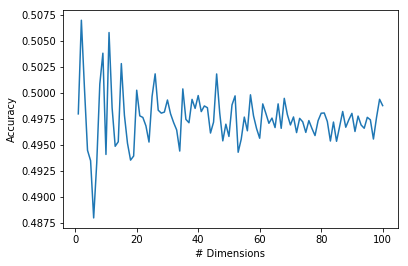

In [50]:
import matplotlib.pyplot as plt
x = [n+1 for n in range(100)]
y = [score for score in accuracy]
plt.plot(x,y)
plt.xlabel('# Dimensions')
plt.ylabel('Accuracy')
plt.show()

c. Discuss what you found in the accuracy plot in 3b. Why do you think you got those results?

The accuracy decreases with increased number of dimensions and appears to trend towards a score of 0.508. 